# Análise dos Dados da CEASP

Como objetivo do segundo dia do desafio Alura 7 Days of Code, vamos fazer uma análise exploratória, visualização e storytelling dos dados tratados da CEASP.

# Importações do projeto e carregamento de dados

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dados_ceasp = pd.read_csv('../data/cleaned/despesa_ceaps_cleaned.csv')
dados_ceasp.head()

,ANO,MES,SENADOR,TIPO_DESPESA,FORNECEDOR,VALOR_REEMBOLSADO,CPF,CNPJ
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",Não tem,12351.52,Não tem,Não tem
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",Não tem,386.60,Não tem,Não tem
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",Não tem,12351.52,Não tem,Não tem
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",Não tem,2610.68,Não tem,Não tem
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",Não tem,12351.52,Não tem,Não tem


# Visão geral do dataset

In [22]:
dados_ceasp.describe()

,ANO,MES,VALOR_REEMBOLSADO
count,317984.000000,317984.000000,3.179840e+05
mean,2015.154366,6.644592,1.031749e+03
std,3.747067,3.308276,5.681849e+03
min,2008.000000,1.000000,-1.500000e+03
25%,2012.000000,4.000000,1.000000e+02
50%,2015.000000,7.000000,2.835750e+02
75%,2018.000000,10.000000,1.000000e+03
max,2022.000000,12.000000,2.016557e+06


In [54]:
dados_ceasp.shape

(317984, 8)

# Análise Descritiva

## Qual foi o senador que mais declarou despesas?

In [23]:
# Contando quantos senadores distintos temos na base
print(f'Temos, no total, {len(dados_ceasp['SENADOR'].unique())} senadores sendo analisados')

Temos, no total, 291 senadores sendo analisados


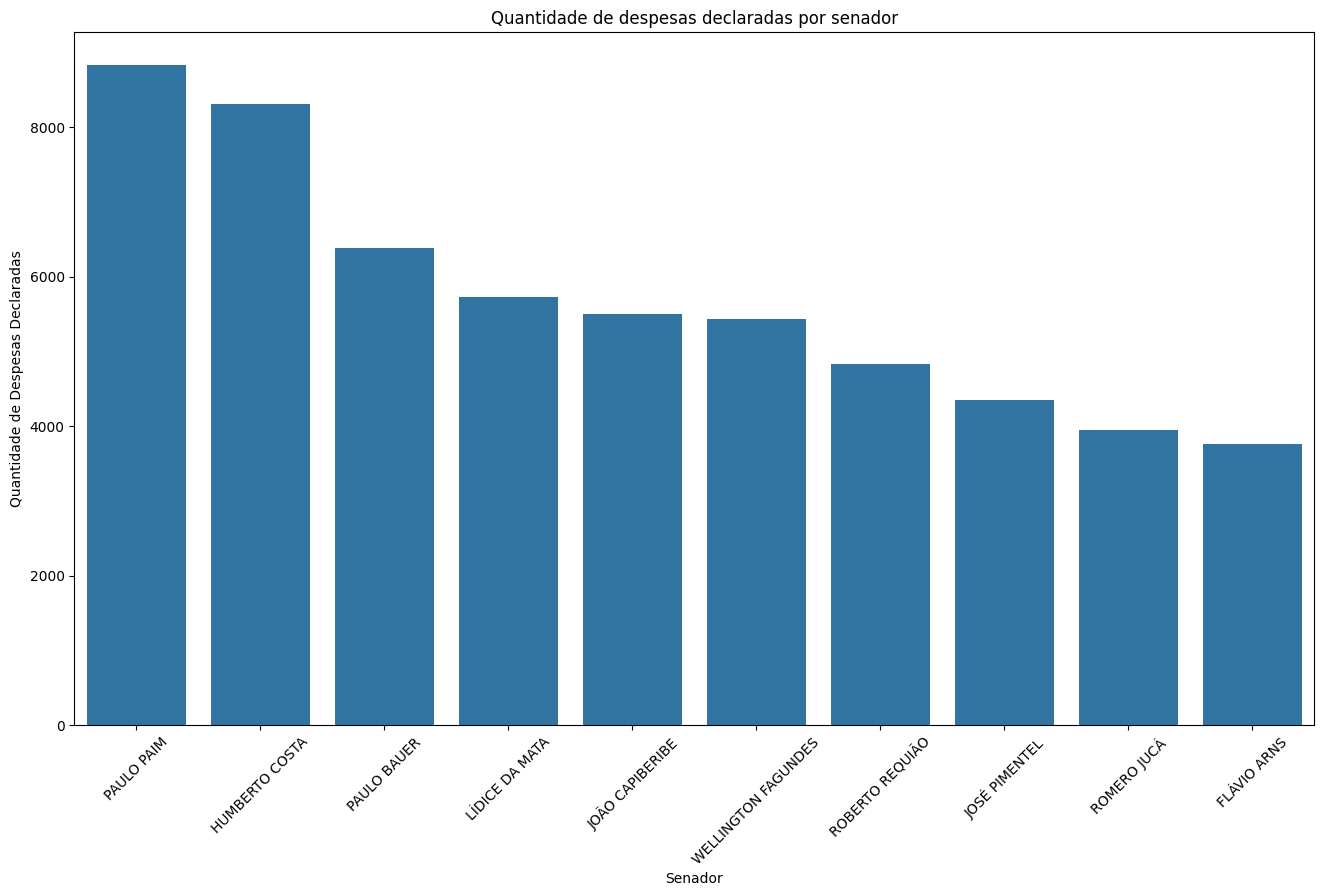

In [40]:
# Senadores que mais declararam despesas

# Montando tabela para o gráfico
despesas_por_senador = dados_ceasp.groupby('SENADOR').size().reset_index()
despesas_por_senador.columns = ['Senador', 'Quantidade de Despesas Declaradas']
despesas_por_senador = despesas_por_senador.sort_values(by='Quantidade de Despesas Declaradas', ascending=False)

# Configurações do subplot
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Montando o gráfico
sns.barplot(despesas_por_senador.head(10), x='Senador', y='Quantidade de Despesas Declaradas', ax=ax)

# Configuração do gráfico
ax.tick_params(axis='x', rotation=45)
ax.set_title('Quantidade de despesas declaradas por senador')

# Exibindo o gráfico
plt.show()

In [46]:
# Nomes dos senadores
print(f'Senadores que mais declararam despesas entre 2008 e 2022: \n{'\n'.join([senador for senador in despesas_por_senador['Senador'].head(10)])}')

Senadores que mais declararam despesas entre 2008 e 2022: 
PAULO PAIM
HUMBERTO COSTA
PAULO BAUER
LÍDICE DA MATA
JOÃO CAPIBERIBE
WELLINGTON FAGUNDES
ROBERTO REQUIÃO
JOSÉ PIMENTEL
ROMERO JUCÁ
FLÁVIO ARNS


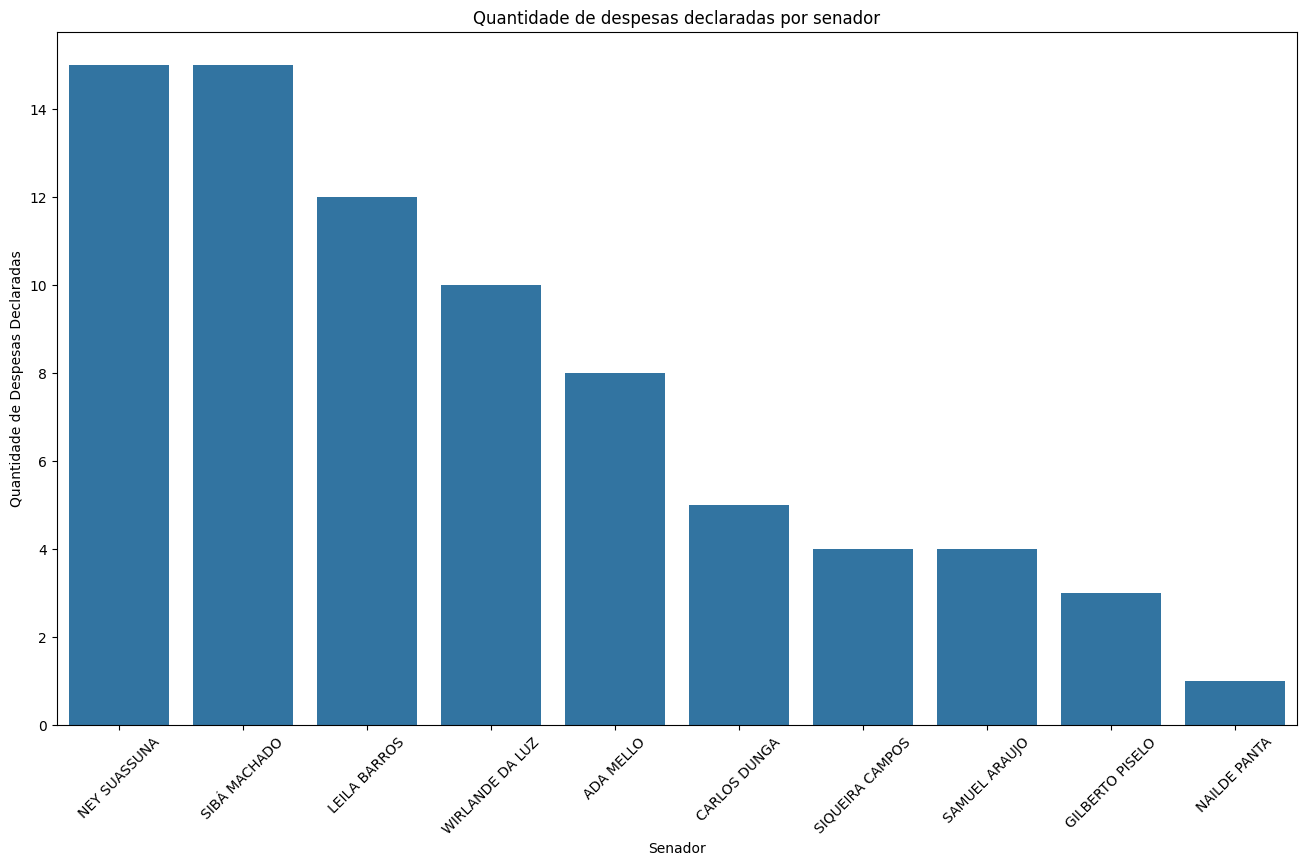

In [41]:
# Senadores que menos declararam despesas

# Configurações do subplot
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Montando o gráfico
sns.barplot(despesas_por_senador.tail(10), x='Senador', y='Quantidade de Despesas Declaradas', ax=ax)

# Configuração do gráfico
ax.tick_params(axis='x', rotation=45)
ax.set_title('Quantidade de despesas declaradas por senador')

# Exibindo o gráfico
plt.show()

In [45]:
# Nomes dos senadores
print(f'Senadores que menos declararam despesas entre 2008 e 2022: \n{'\n'.join([senador for senador in despesas_por_senador['Senador'].tail(10)])}')

Senadores que menos declararam despesas entre 2008 e 2022: 
NEY SUASSUNA
SIBÁ MACHADO
LEILA BARROS
WIRLANDE DA LUZ
ADA MELLO
CARLOS DUNGA
SIQUEIRA CAMPOS
SAMUEL ARAUJO
GILBERTO PISELO
NAILDE PANTA


## Qual foi o percentual da cota que os senadores gastaram? Teve algum com mais de 90%?

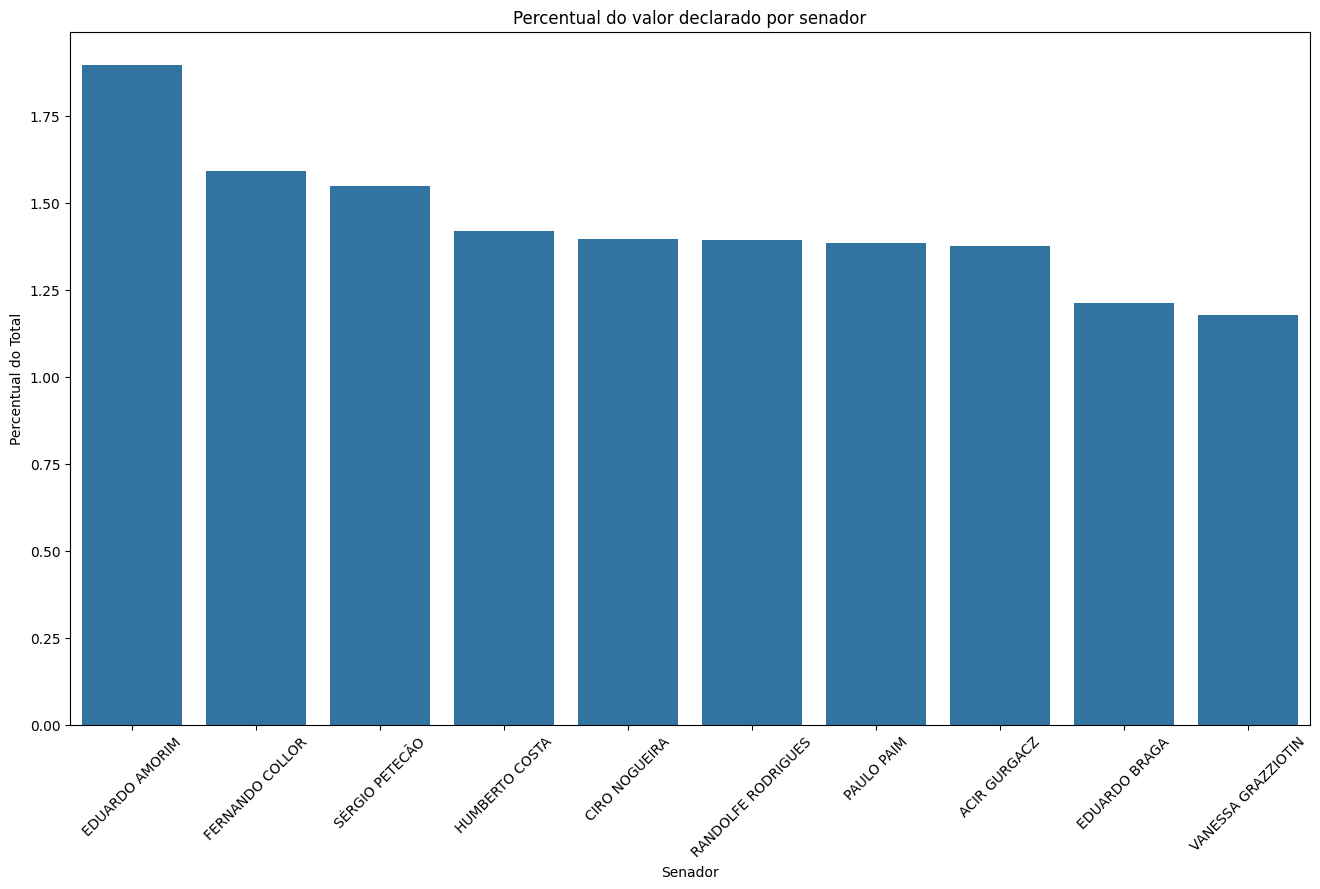

In [63]:
# Percentual gasto pelos senadores

# Montando a tabela de percentual
percentual_cota = dados_ceasp.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().reset_index().sort_values(by='VALOR_REEMBOLSADO', ascending=False)
percentual_cota.columns = ['Senador', 'Total Reembolsado']
percentual_cota.loc[:, 'Percentual do Total'] = (percentual_cota['Total Reembolsado'] / percentual_cota['Total Reembolsado'].sum()) * 100

# Configurações do subplot
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Montando o gráfico
sns.barplot(percentual_cota.head(10), x='Senador', y='Percentual do Total', ax=ax)

# Configuração do gráfico
ax.tick_params(axis='x', rotation=45)
ax.set_title('Percentual do valor declarado por senador')

# Exibindo o gráfico
plt.show()

In [64]:
# Nomes dos senadores
print(f'Senadores com maior percentual de gastos entre 2008 e 2022: \n{'\n'.join([senador for senador in percentual_cota['Senador'].head(10)])}')

Senadores com maior percentual de gastos entre 2008 e 2022: 
EDUARDO AMORIM
FERNANDO COLLOR
SÉRGIO PETECÃO
HUMBERTO COSTA
CIRO NOGUEIRA
RANDOLFE RODRIGUES
PAULO PAIM
ACIR GURGACZ
EDUARDO BRAGA
VANESSA GRAZZIOTIN


**Insights**
- Nem sempre quem tem mais despesa gasta mais.
- Nenhum senador passou de 2% do total declarado, uma vez que a soma do gastos de cada um deles deles, se dividido pelo total geral, é bem menor.

## Em ano de eleições os senadores gastam mais?

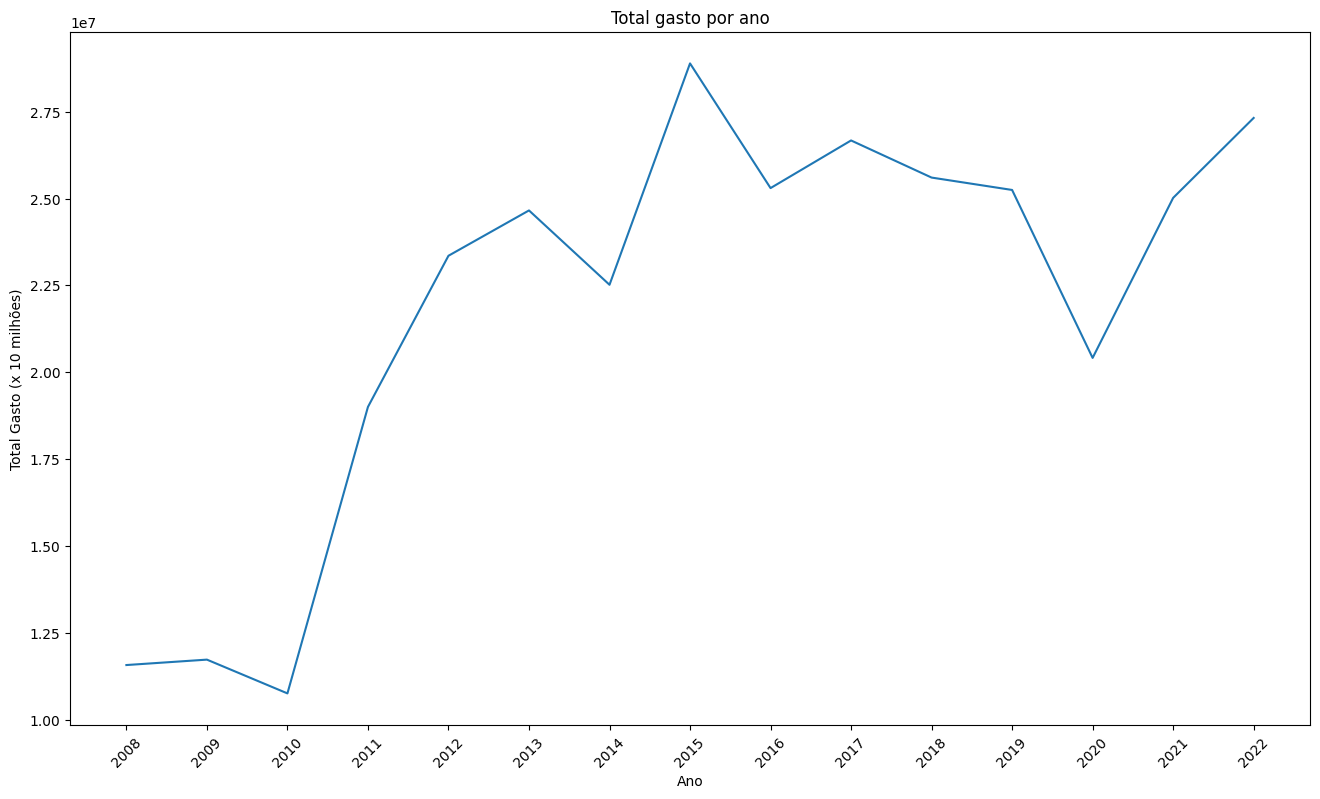

In [77]:
# Total de gastos por ano

# Montando a tabela de percentual
total_por_ano = dados_ceasp.groupby('ANO')['VALOR_REEMBOLSADO'].sum().reset_index().sort_values(by='VALOR_REEMBOLSADO', ascending=False)
total_por_ano.columns = ['Ano', 'Total Gasto']

# Configurações do subplot
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Montando o gráfico
sns.lineplot(total_por_ano, x='Ano', y='Total Gasto', ax=ax)

# Configuração do gráfico
ax.tick_params(axis='x', rotation=45)
ax.set_title('Total gasto por ano')
ax.set_xticks(range(2008, 2023))
ax.set_ylabel('Total Gasto (x 10 milhões)')

# Exibindo o gráfico
plt.show()

**Insights**
- Em ano eleitoral, tende a haver uma queda no ano anterior, mas, no ano a seguir, há um aumento dos gastos
- Esse primeiro padrão acaba de 2018 para 2019, de 2019 pra 2020 temos o começo da pandemia, o que torna justificável
- De 2020 para 2022, temos um aumento significativo de gastos (2022 volta para a faixa 2.25 - 2.75)

## Com o que os senadores mais gastaram?

In [90]:
# Tipos de despesa com mais gastos

# Montando a tabela de gastos por tipo de despesa
tipos_despesa = dados_ceasp.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().reset_index().sort_values(by='VALOR_REEMBOLSADO', ascending=False)
tipos_despesa.columns = ['Tipo da Despesa', 'Total Gasto']

# Configurações do subplot
tipos_despesa

,Tipo da Despesa,Total Gasto
4,"Locomoção, hospedagem, alimentação, combustíve...",77585652.54
5,"Passagens aéreas, aquáticas e terrestres nacio...",76059427.64
0,"Aluguel de imóveis para escritório político, c...",60142652.12
2,"Contratação de consultorias, assessorias, pesq...",55894018.37
3,Divulgação da atividade parlamentar,42550401.53
1,Aquisição de material de consumo para uso no e...,12755148.47
6,Serviços de Segurança Privada,3092528.50


**Insights**
- Os maiores gastos dos senadores são com passagens aéreas, locomoção, hospedagem, alimentação, etc. (devem viajar em executiva, hotel 5 estrelas)
- Menos gastos com segurança privada